<a href="https://colab.research.google.com/github/khotu/DeepLearning/blob/master/Tensor_NN_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
import tempfile
print(tempfile.gettempdir())

/tmp


In [3]:
tf.__version__

'1.15.0'

In [4]:
x_data = np.linspace(0, 10, num = 100000)
x_data

array([0.00000e+00, 1.00001e-04, 2.00002e-04, ..., 9.99980e+00,
       9.99990e+00, 1.00000e+01])

In [0]:
noise = np.random.randn(len(x_data))

In [6]:
y_data =  (0.5*x_data) + 5 + noise
y_data

array([ 4.78090896,  4.59878164,  4.17998421, ..., 10.9732412 ,
       10.84630859,  9.45369736])

In [0]:
df = pd.DataFrame(data = x_data, columns=['X-data'])
df['Y'] = y_data

In [8]:
df.head()

,X-data,Y
0,0.0000,4.780909
1,0.0001,4.598782
2,0.0002,4.179984
3,0.0003,5.571280
4,0.0004,5.228219


In [0]:
sample = df.sample(250)

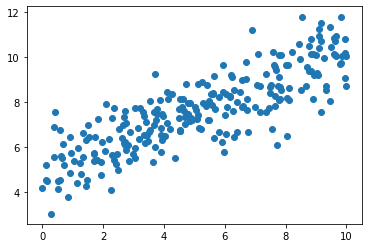

In [10]:
plt.scatter(sample.iloc[:,0], sample.iloc[:,1])

In [0]:
feat_col = [tf.feature_column.numeric_column('x', shape = [1])]

In [12]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_col, )

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp9n5mqsaw', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7faac0f12588>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [0]:
from sklearn.model_selection import train_test_split

In [14]:
train_x, test_x, train_y, test_y = train_test_split(x_data, y_data, test_size = 0.2, random_state = 0)
train_x

array([1.03821038, 7.31717317, 3.09383094, ..., 4.26134261, 4.35674357,
       6.82686827])

In [0]:
input_fn = tf.estimator.inputs.numpy_input_fn(x = {'x' : train_x}, y=train_y, batch_size=10, num_epochs=None, shuffle=True)

In [0]:
train_input_fn = tf.estimator.inputs.numpy_input_fn(x = {'x' : train_x}, y=train_y, batch_size=10, num_epochs=100, shuffle=False)

In [0]:

test_input_fn = tf.estimator.inputs.numpy_input_fn(x = {'x' : train_x}, y=train_y, batch_size=10, num_epochs=100, shuffle=False)

In [18]:
estimator.train(input_fn=input_fn, steps=100)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use `tf.cast` instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp9n5mqsaw/mo

In [19]:
train_metrics = estimator.evaluate(input_fn= train_input_fn, steps = 100)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-03-07T14:06:23Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp9n5mqsaw/model.ckpt-100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [10/100]
INFO:tensorflow:Evaluation [20/100]
INFO:tensorflow:Evaluation [30/100]
INFO:tensorflow:Evaluation [40/100]
INFO:tensorflow:Evaluation [50/100]
INFO:tensorflow:Evaluation [60/100]
INFO:tensorflow:Evaluation [70/100]
INFO:tensorflow:Evaluation [80/100]
INFO:tensorflow:Evaluation [90/100]
INFO:tensorflow:Evaluation [100/100]
INFO:tensorflow:Finished evaluation at 2020-03-07-14:06:23
INFO:tensorflow:Saving dict for global step 100: average_loss = 3.5003128, global_step = 100, label/mean = 7.485059, loss = 35.003128, prediction/mean = 6.8870215
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 100: /tmp/tmp9n5mqsaw/mod

In [26]:
test_metrics = estimator.evaluate(input_fn= test_input_fn, steps=100)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-03-07T14:59:10Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp9n5mqsaw/model.ckpt-100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [10/100]
INFO:tensorflow:Evaluation [20/100]
INFO:tensorflow:Evaluation [30/100]
INFO:tensorflow:Evaluation [40/100]
INFO:tensorflow:Evaluation [50/100]
INFO:tensorflow:Evaluation [60/100]
INFO:tensorflow:Evaluation [70/100]
INFO:tensorflow:Evaluation [80/100]
INFO:tensorflow:Evaluation [90/100]
INFO:tensorflow:Evaluation [100/100]
INFO:tensorflow:Finished evaluation at 2020-03-07-14:59:10
INFO:tensorflow:Saving dict for global step 100: average_loss = 3.5003128, global_step = 100, label/mean = 7.485059, loss = 35.003128, prediction/mean = 6.8870215
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 100: /tmp/tmp9n5mqsaw/mod

In [21]:
train_metrics

{'average_loss': 3.5003128,
 'global_step': 100,
 'label/mean': 7.485059,
 'loss': 35.003128,
 'prediction/mean': 6.8870215}

In [22]:
test_metrics

{'average_loss': 3.5003128,
 'global_step': 100,
 'label/mean': 7.485059,
 'loss': 35.003128,
 'prediction/mean': 6.8870215}

In [0]:
input_fun_predict = tf.estimator.inputs.numpy_input_fn(x={'x': test_x}, shuffle=False)

In [29]:
estimator.predict(input_fn=input_fun_predict)

<generator object Estimator.predict at 0x7faaaf006e60>

In [31]:
prediction = []
for i in estimator.predict(input_fn=input_fun_predict):
  prediction.append(i['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp9n5mqsaw/model.ckpt-100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [32]:
len(prediction)

20000

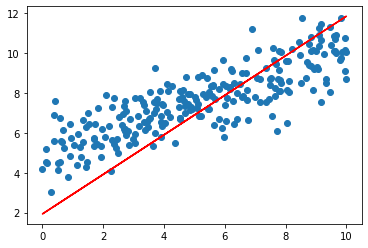

In [34]:
plt.scatter(sample.iloc[:,0], sample.iloc[:,1])
plt.plot(test_x, prediction, 'r')